In [1]:
import pickle 
import numpy as np 
from ecog_utils import erp_util
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
source_path = './source_data/ED_6/'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

npz_path = f"{source_path}/sorted_ied_vars.npz"
D = np.load(npz_path, allow_pickle=True)

clus_preds = D["clus_preds"]
norm_data = D["norm_data"]


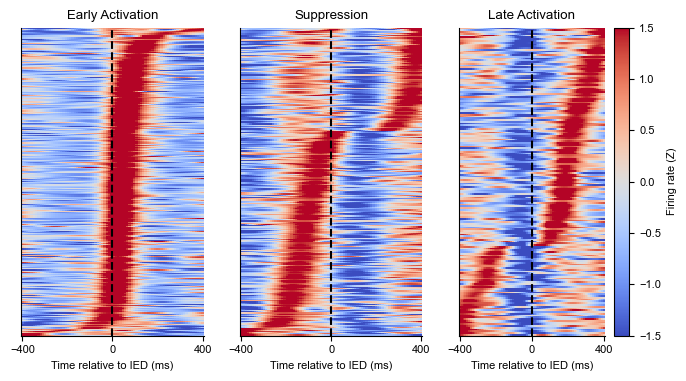

In [3]:

fig,axs = plt.subplots(1,3,figsize=(8,4))
ax = axs[0]

norm_data_ = norm_data[clus_preds == 0]
t_ar = np.linspace(-400,400,norm_data_.shape[1])
peak_timing = np.argsort(np.argmax(norm_data_,axis=1))
im = ax.pcolormesh(t_ar,range(len(norm_data_)),norm_data_[peak_timing,:],cmap='coolwarm',vmin=-1.5,vmax=1.5)
#fig.colorbar(im,ax=ax,label='Firing rate (Z)')
ax.set(yticks=[],xticks=[-400,0,400],xlabel='Time relative to IED (ms)',title='Early Activation')
ax.axvline(0,color='k',linestyle='--')
np.savetxt(f'./statistical_source/ED6/early_act.txt', norm_data_[peak_timing,:])

ax = axs[1]

norm_data_ = norm_data[clus_preds == 1]
t_ar = np.linspace(-400,400,norm_data_.shape[1])
peak_timing = np.argsort(np.argmax(norm_data_,axis=1))
im = ax.pcolormesh(t_ar,range(len(norm_data_)),norm_data_[peak_timing,:],cmap='coolwarm',vmin=-1.5,vmax=1.5)
#fig.colorbar(im,ax=ax,label='Firing rate (Z)')
ax.set(yticks=[],xticks=[-400,0,400],xlabel='Time relative to IED (ms)',title='Suppression')
ax.axvline(0,color='k',linestyle='--')
np.savetxt(f'./statistical_source/ED6/supp.txt', norm_data_[peak_timing,:])

ax = axs[2]

norm_data_ = norm_data[clus_preds == 2]
t_ar = np.linspace(-400,400,norm_data_.shape[1])
peak_timing = np.argsort(np.argmax(norm_data_,axis=1))
im = ax.pcolormesh(t_ar,range(len(norm_data_)),norm_data_[peak_timing,:],cmap='coolwarm',vmin=-1.5,vmax=1.5)
fig.colorbar(im,ax=ax,label='Firing rate (Z)')
ax.set(yticks=[],xticks=[-400,0,400],xlabel='Time relative to IED (ms)',title='Late Activation')
ax.axvline(0,color='k',linestyle='--')
np.savetxt(f'./statistical_source/ED6/late_act.txt', norm_data_[peak_timing,:])

#fig.savefig('./current_composite_plots/sorted_by_act_time.jpg',bbox_inches='tight',dpi=200)
